In [8]:
# 安装库
import tushare as ts
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import statsmodels.api as sm
import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
sns.set(font='SimHei')
plt.rcParams['font.sans-serif'] = ['SimHei'] #解决中文显示
plt.rcParams['axes.unicode_minus'] = False   #解决符号无法显示
#中国平安（600000.SH）沪   
# 设置 tushare token，需要在 tushare 官网注册获取
ts.set_token('fd7578985d4cf15a6912ab7113c64c09a83a229574e12ded1c625dff') 
# 初始化 pro 接口  
pro = ts.pro_api()  
 # 获取数据并记录成功或失败信息  
df= pro.query('daily', ts_code='600000.SH', start_date='20160101', end_date='20240509')
print(f"SH.csv 下载状态：{df is not None}")  
# 计算总下载时间（如果至少有一个数据帧是成功的）  
if df is not None :  
    start_time = datetime.now()  # 记录开始时间  
    df.to_csv('SH.csv', index=False)   
    end_time = datetime.now()  # 记录结束时间  
    total_time = end_time - start_time  # 计算总下载时间  
    print(f"总下载时间：{total_time}秒")  
else:  
    print("所有数据帧下载失败。")  

SH.csv 下载状态：True
总下载时间：0:00:00.021021秒


In [9]:
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600000.SH,20240509,7.80,7.85,7.76,7.80,7.80,0.00,0.0000,339420.90,264867.396
1,600000.SH,20240508,7.81,7.85,7.78,7.80,7.82,-0.02,-0.2558,303778.93,237540.800
2,600000.SH,20240507,7.85,7.86,7.72,7.82,7.85,-0.03,-0.3822,462695.05,360376.178
3,600000.SH,20240506,7.82,7.89,7.75,7.85,7.70,0.15,1.9481,859373.25,673787.209
4,600000.SH,20240430,7.58,7.84,7.56,7.70,7.42,0.28,3.7736,1054727.88,813284.484
...,...,...,...,...,...,...,...,...,...,...,...
2004,600000.SH,20160108,17.74,17.88,16.91,17.49,17.51,-0.02,-0.1100,719182.96,1262105.060
2005,600000.SH,20160107,17.80,17.90,17.40,17.51,18.10,-0.59,-3.2600,113504.79,199502.702
2006,600000.SH,20160106,17.90,18.14,17.69,18.10,17.96,0.14,0.7800,467726.53,838667.398
2007,600000.SH,20160105,17.51,18.06,17.40,17.96,17.80,0.16,0.9000,580547.93,1034181.474


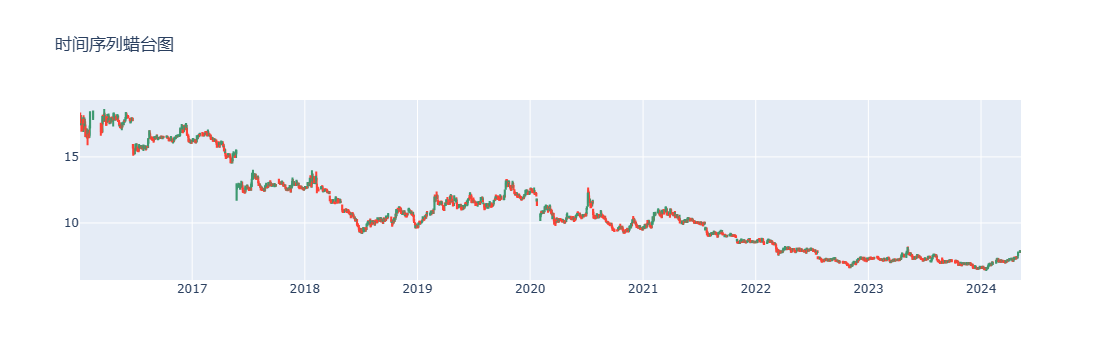

In [10]:
# 将trade_date列转换为日期格式
df['trade_date'] = pd.to_datetime(df['trade_date'], format='%Y%m%d')
#绘制时间序列烛台图
#烛台图以醒目的方式呈现开盘价、最高价、最低价和收盘价。红线表示价格下跌，绿线表示价格上涨
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x = df.trade_date,open = df["open"],high = df["high"],low = df["low"],close = df["close"])])
figure.update_layout(title = "时间序列蜡台图", xaxis_rangeslider_visible = False)
figure.show()

In [11]:
# 导入数据集并将其转换为时间序列
df = pd.read_csv('SH.csv', index_col='trade_date', parse_dates=True)
df.drop(columns=['ts_code'], inplace=True)

In [12]:
df

,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,
2024-05-09,7.80,7.85,7.76,7.80,7.80,0.00,0.0000,339420.90,264867.396
2024-05-08,7.81,7.85,7.78,7.80,7.82,-0.02,-0.2558,303778.93,237540.800
2024-05-07,7.85,7.86,7.72,7.82,7.85,-0.03,-0.3822,462695.05,360376.178
2024-05-06,7.82,7.89,7.75,7.85,7.70,0.15,1.9481,859373.25,673787.209
2024-04-30,7.58,7.84,7.56,7.70,7.42,0.28,3.7736,1054727.88,813284.484
...,...,...,...,...,...,...,...,...,...
2016-01-08,17.74,17.88,16.91,17.49,17.51,-0.02,-0.1100,719182.96,1262105.060
2016-01-07,17.80,17.90,17.40,17.51,18.10,-0.59,-3.2600,113504.79,199502.702
2016-01-06,17.90,18.14,17.69,18.10,17.96,0.14,0.7800,467726.53,838667.398


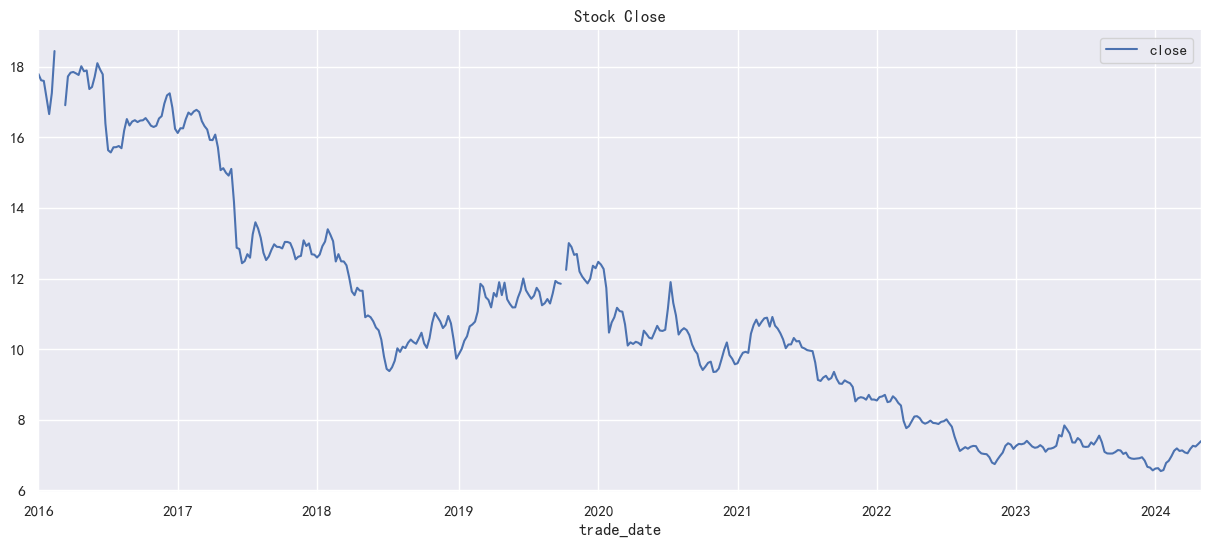

In [13]:
#数据预处理
#取出收盘价的数据并进行重采样，以周且指定周一为单位求平均值。然后指定2016-1月到2024-4月的数据作为训练数据。最后将训练数据进行可视化展示。
# 重点分析收盘价并预测，对原始数据进行重采样，以周且指定周一为单位求平均值
df = pd.read_csv('SH.csv', index_col='trade_date', parse_dates=True)
df.drop(columns=['ts_code'], inplace=True)
stock_week = df['close'].resample('W-MON').mean()
# 取出2016-1月到2024-4月的数据作为训练数据
stock_train = stock_week['2016-1':'2024-4']
# 做出折线图
stock_train.plot(figsize=(15,6))
plt.legend()
plt.title('Stock Close')
sns.despine()

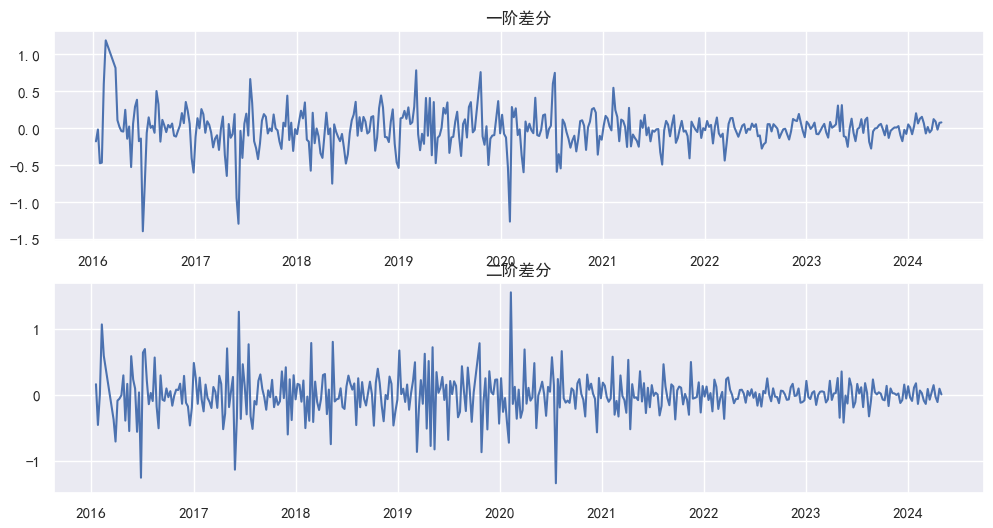

In [14]:
#差分并确定参数d 保证数据的平稳性
#ARIMA(p,d,q)模型。其中，p表示自回归阶数，d表示差分阶数，q表示移动平均阶数。
# 将时间序列进行差分并确定参数d
# 一阶差分
stock_diff_1 = stock_train.diff()
stock_diff_1.dropna(inplace=True)
# 二阶差分
stock_diff_2 = stock_diff_1.diff()
stock_diff_2.dropna(inplace=True)
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(stock_diff_1)
plt.title('一阶差分')
plt.subplot(2,1,2)
plt.plot(stock_diff_2)
plt.title('二阶差分')
plt.show()

In [15]:
#将时间序列进行差分，直到其成为平稳序列
ts = df['close']
d = 0
while not sm.tsa.stattools.adfuller(ts)[1] < 0.05:
    ts = ts.diff().dropna()
    d += 1
print('参数d为：',d)

参数d为： 1


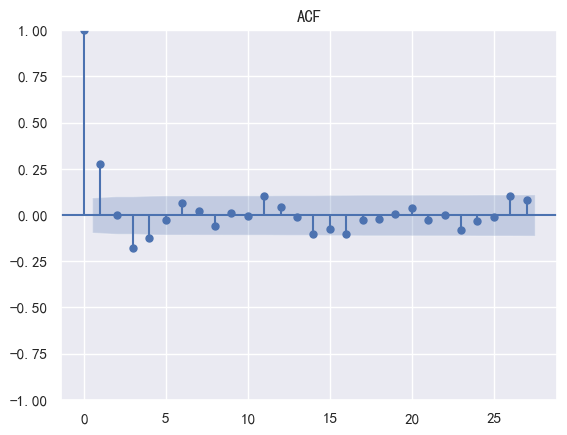

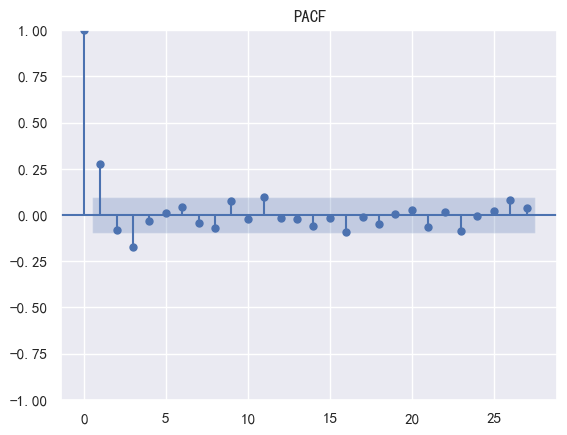

In [16]:

# 做出ACF图确定参数q（自回归阶数））
sm.graphics.tsa.plot_acf(stock_diff_1)
plt.title('ACF')
plt.show()
# 做出PACF图并确定参数p（移动平均阶数）
sm.graphics.tsa.plot_pacf(stock_diff_1)
plt.title('PACF')
plt.show()

In [17]:
#除了观察图形，我们也可以使用下面代码进行确定参数p/q:
# 根据AIC和BIC的值来确定参数
train_result = sm.tsa.arma_order_select_ic(stock_train,ic=['aic','bic'],trend='c',max_ar=4,max_ma=4)
print('AIC',train_result.aic_min_order)
print('BIC',train_result.bic_min_order)
#这里如果BIC和AIC的值不一样，你两个结果都试试，看看哪个参数组合训练的模型效果最好。这里AIC和BIC的结果都是(1,1)，说明p=q=1是最佳的参数结果。

AIC (3, 2)
BIC (4, 0)


In [18]:
#训练模型并预测
#这里的order（p,d,q）,将前面确定数值填进去即可，freq则是为了和前面重采样保持一致。
# 拟合ARIMA模型
model = sm.tsa.ARIMA(stock_train, order=(1, 1, 1),freq='W-MON')
result = model.fit()

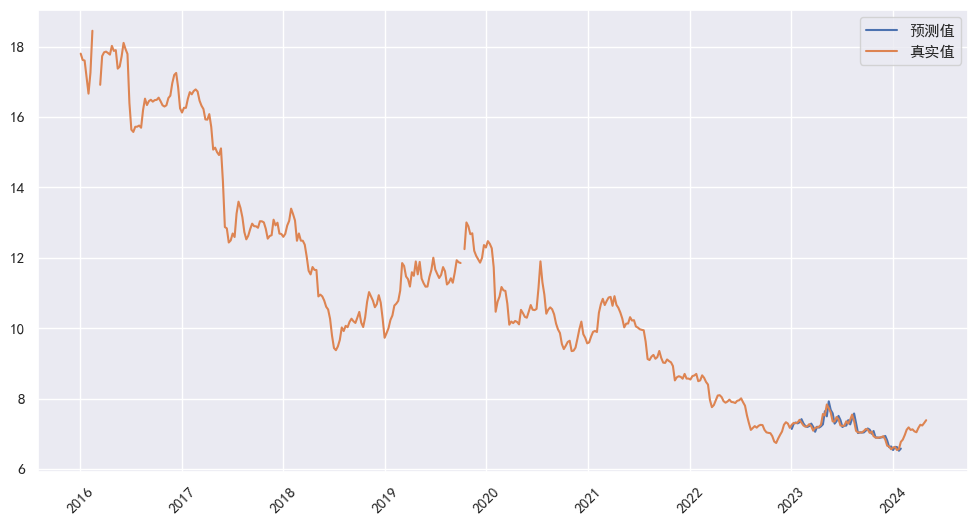

In [19]:
#预测的时候需要填写起始时间和终止时间，注意起始时间必须在训练数据中出现
# 使用该模型进行预测
#forecast = result.predict(start='2023-01-08', end='2024-01-08')#注意时间索引的格式
forecast = result.predict(start='2023-01', end='2024-01')
#我们将预测的结果和真实值可视化出来：
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.plot(forecast,label='预测值')
plt.plot(stock_train,label='真实值')
plt.legend()
plt.show()

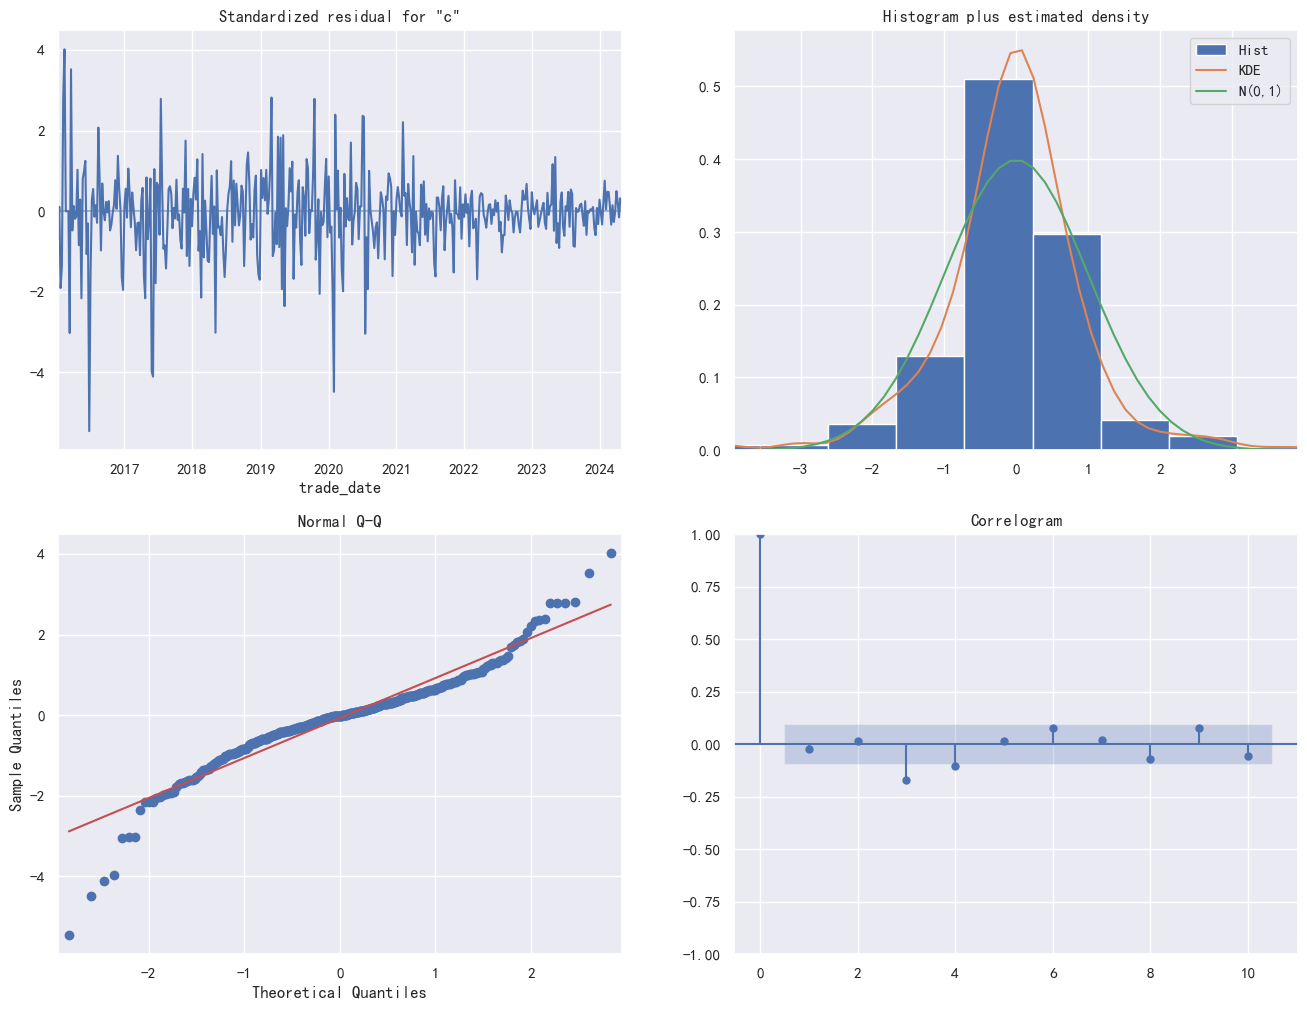

In [20]:
#模型效果评估
#这里我们直接调用plot_diagnostics（）方法将模型的评估结果可视化展示
# 残差分析、正态分布、QQ图、相关系数
result.plot_diagnostics(figsize=(16,12))
plt.show()

上左是残差分析图，可以发现模型残差不完全为0，在-5到4之间波动。
上右是直方图和正太分布图，可知模型近似于正太分布
下左是QQ图，可以发现除了两端少数极点，大部分数据都可以用一条直线拟合。
下右是相关系数图，图中的点呈现随机分布且接近于零，说明模型的残差与自变量之间没有明显的相关性，这是一个好的迹象，表示模型的拟合较好。

In [21]:
#最后我们也可以使用summary()函数来查看模型的效果指标。
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                  435
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -16.635
Date:                Wed, 12 Jun 2024   AIC                             39.269
Time:                        22:14:20   BIC                             51.489
Sample:                    01-04-2016   HQIC                            44.093
                         - 04-29-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0853      0.155      0.550      0.583      -0.219       0.389
ma.L1          0.1841      0.156      1.182      0.237      -0.121       0.489
sigma2         0.0628      0.002     25.996      0.000       0.058       0.068
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):               433.02
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

这张表是关于一个SARIMAX模型的结果摘要。让我们逐项解释：
Dep. Variable: 模型中使用的因变量（或响应变量）是"close"，即股票的收盘价或类似的金融数据。
No. Observations: 观测的数据点数量为435个。
Model: SARIMAX模型的具体规范是ARIMA(1, 1, 1)，这指的是自回归积分移动平均模型，具体参数为(p, d, q) = (1, 1, 1)。
Log Likelihood: 对数似然值为-16.635，用于评估模型拟合数据的程度，数值越高表示模型拟合越好。对数似然值本身无法单独确定好坏，而是需要与其他模型的对数似然值进行比较。通常情况下，数值越高表示模型对数据的拟合越好，但具体好坏需要结合实际情况和其他模型来评判。
AIC: Akaike信息准则的值为39.269。AIC用于比较不同模型的拟合优度，数值越小表示模型越好。39.269 是一个比较低的值，表明这个SARIMAX模型在一定程度上对数据的拟合较好。
BIC: 贝叶斯信息准则的值为51.489。BIC也用于模型选择，它比AIC更严格地惩罚参数多的模型，同样数值越小表示模型越好。51.489 是一个相对较高的值，表示相对于其他可能的模型，这个SARIMAX模型在BIC的评估下可能稍逊色一些。
HQIC: Hannan-Quinn信息准则的值为44.093，也是用于模型选择的一个指标。
Covariance Type: 协方差类型为"opg"，指定了用来估计标准错误和其他统计量的协方差估计方法。
coef, std err, z, P>|z|, [0.025, 0.975]: 模型的系数估计及其统计显著性。这些列包含了自回归和移动平均项的系数估计值、标准误差、z值（用于检验系数是否显著）、p值、以及系数的置信区间。
sigma2: 模型的残差方差估计为0.0628。

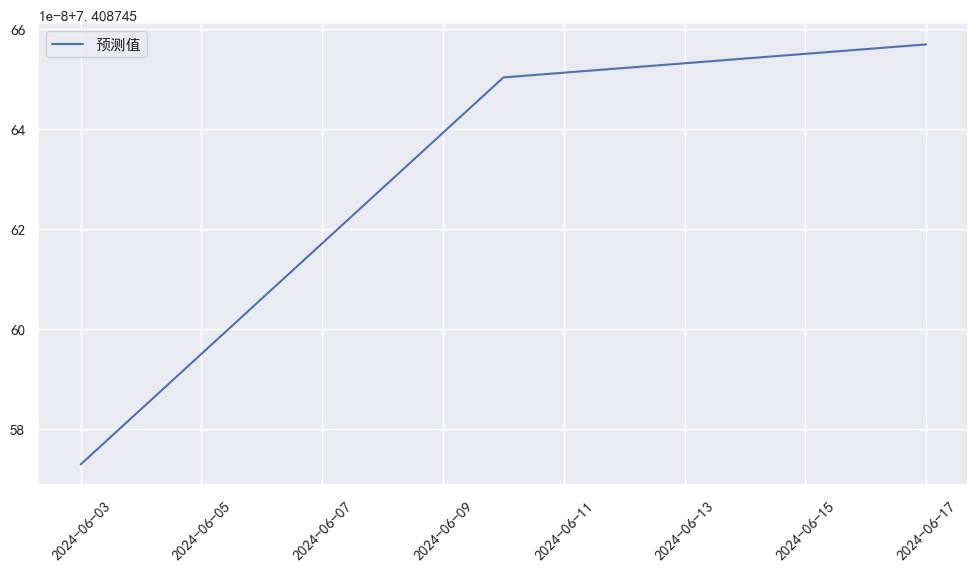

In [22]:
#预测的时候需要填写起始时间和终止时间，注意起始时间必须在训练数据中出现
# 使用该模型进行预测
#forecast = result.predict(start='2023-01-08', end='2024-01-08')
forecast = result.predict(start='2024-06-01', end='2024-06-15')
#注意时间索引的格式
#我们将预测的结果和真实值可视化出来：
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.plot(forecast,label='预测值')
#plt.plot(stock_train,label='真实值')
plt.legend()
plt.show()